In [1]:
# Since the cleaned file is not accessible, let's reload the original data and clean it again before proceeding
df_bluetooth = pd.read_csv('/mnt/data/Raum639.csv')

# Clean the dataset by removing missing values and ensuring proper numeric values in the 'device_count_consumer'
df_bluetooth_cleaned = df_bluetooth.dropna()

# Convert the 'device_count_consumer' to numeric if possible, and remove rows where this conversion fails
df_bluetooth_cleaned['device_count_consumer'] = pd.to_numeric(df_bluetooth_cleaned['device_count_consumer'], errors='coerce')
df_bluetooth_cleaned = df_bluetooth_cleaned.dropna(subset=['device_count_consumer'])

# Now convert time data into comparable formats
df_bluetooth_cleaned['datetime'] = pd.to_datetime(df_bluetooth_cleaned['2023-12-04T12:24:00Z'])

# Create the schedule based on the PDF information
schedule = {
    'module': ['Datenbank', 'Prog3', 'PGI', 'Prog1', 'Prog3', 'DS', 'DS', 'Prog3', 'B42', 'B42', 'B41', 'TutProg2'],
    'time_start': ['14:00', '15:45', '09:45', '08:00', '12:15', '12:15', '14:00', '09:45', '14:00', '12:15', '09:45', '17:30'],
    'time_end': ['15:30', '17:15', '11:15', '09:30', '13:45', '13:45', '15:30', '11:15', '15:30', '13:45', '11:15', '19:00'],
    'date': ['2023-12-11', '2023-12-12', '2023-12-12', '2023-12-13', '2023-12-13', '2023-12-14', '2023-12-14', '2023-12-15', 
             '2023-12-15', '2023-12-15', '2023-12-16', '2023-12-17']
}

df_schedule = pd.DataFrame(schedule)

# Convert the time information into datetime for comparison
df_schedule['datetime_start'] = pd.to_datetime(df_schedule['date'] + ' ' + df_schedule['time_start'])
df_schedule['datetime_end'] = pd.to_datetime(df_schedule['date'] + ' ' + df_schedule['time_end'])

# Initialize list to store attendance data
attendance_data = []

# Loop through the schedule and calculate attendance for each module
for index, row in df_schedule.iterrows():
    module_attendance = df_bluetooth_cleaned[
        (df_bluetooth_cleaned['datetime'] >= row['datetime_start']) & 
        (df_bluetooth_cleaned['datetime'] <= row['datetime_end'])
    ]
    
    attendance_count = module_attendance['device_count_consumer'].sum()
    attendance_data.append({
        'module': row['module'],
        'start_time': row['datetime_start'],
        'end_time': row['datetime_end'],
        'attendance_count': attendance_count
    })

df_attendance = pd.DataFrame(attendance_data)

# Save the final attendance data to a CSV file
output_attendance_path = '/mnt/data/module_attendance.csv'
df_attendance.to_csv(output_attendance_path, index=False)

# Display the path to the generated file
output_attendance_path


NameError: name 'pd' is not defined

In [2]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Toni\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Bluetooth data
df_bluetooth = pd.read_csv('Raum639.csv')  # Replace with the actual path to your CSV file

# Manually enter the schedule
schedule = {
    'module': ['Datenbank', 'Prog3', 'PGI', 'Prog1', 'DatenSich'],
    'time_start': ['14:00', '15:45', '09:45', '08:00', '14:00'],
    'time_end': ['15:30', '17:15', '11:15', '09:30', '15:30'],
    'date': ['2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-11']
}

df_schedule = pd.DataFrame(schedule)

# Convert time data into a comparable format
df_bluetooth['timestamp'] = pd.to_datetime(df_bluetooth['2023-12-04T12:24:00Z'])  # Replace with the actual timestamp column name
df_schedule['datetime_start'] = pd.to_datetime(df_schedule['date'] + ' ' + df_schedule['time_start'])
df_schedule['datetime_end'] = pd.to_datetime(df_schedule['date'] + ' ' + df_schedule['time_end'])

# Initialize an empty list to hold the attendance data for each module
attendance_data = []

# Iterating over the schedule to calculate attendance
for index, row in df_schedule.iterrows():
    module_attendance = df_bluetooth[
        (df_bluetooth['timestamp'] >= row['datetime_start']) & 
        (df_bluetooth['timestamp'] <= row['datetime_end'])
    ]
    
    # Summing the device counts during the class time
    attendance_count = module_attendance['8'].sum()  # Assuming column '8' holds the device count
    attendance_data.append({
        'module': row['module'],
        'attendance_count': attendance_count,
        'time': f"{row['time_start']} - {row['time_end']}"
    })

# Creating a DataFrame with the attendance data
df_attendance = pd.DataFrame(attendance_data)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(df_attendance['module'], df_attendance['attendance_count'], color='lightcoral')

# Adding labels and title
plt.xlabel('Number of Attendees')
plt.ylabel('Module')
plt.title('Attendance per Module and Time Slot')

# Adding attendance counts on the bars
for index, value in enumerate(df_attendance['attendance_count']):
    plt.text(value, index, str(int(value)))

# Show the plot
plt.tight_layout()
plt.show()


TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and Timestamp

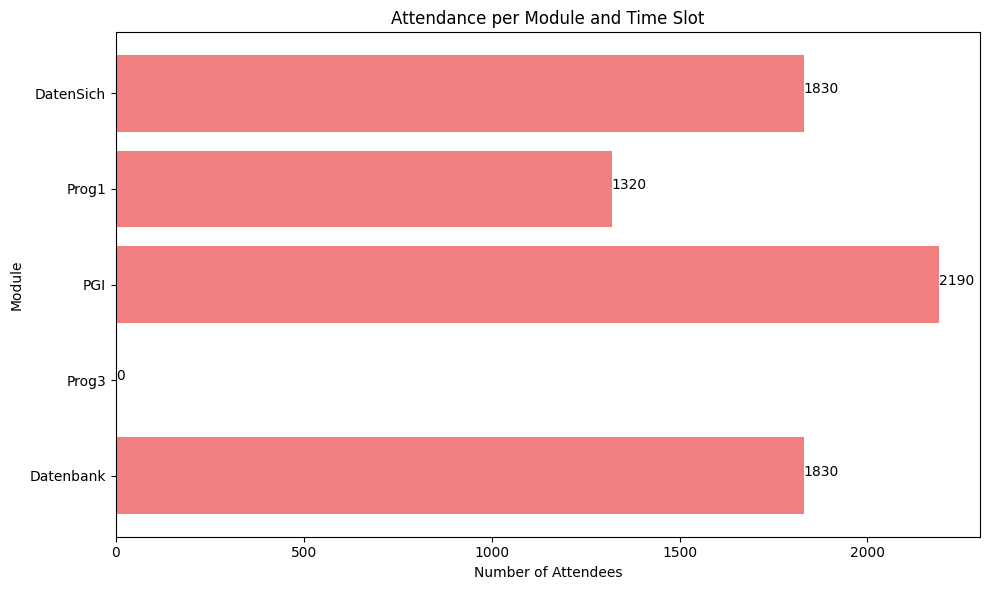

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Bluetooth data
df_bluetooth = pd.read_csv('Raum639.csv')  # Replace with the actual path to your CSV file

# Manually enter the schedule
schedule = {
    'module': ['Datenbank', 'Prog3', 'PGI', 'Prog1', 'DatenSich'],
    'time_start': ['14:00', '15:45', '09:45', '08:00', '14:00'],
    'time_end': ['15:30', '17:15', '11:15', '09:30', '15:30'],
    'date': ['2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-11']
}

df_schedule = pd.DataFrame(schedule)

# Convert time data into a comparable format
df_bluetooth['timestamp'] = pd.to_datetime(df_bluetooth['2023-12-04T12:24:00Z'])  # Replace with the actual timestamp column name
df_bluetooth['timestamp'] = df_bluetooth['timestamp'].dt.tz_localize(None)  # Remove timezone
df_schedule['datetime_start'] = pd.to_datetime(df_schedule['date'] + ' ' + df_schedule['time_start']).dt.tz_localize(None)
df_schedule['datetime_end'] = pd.to_datetime(df_schedule['date'] + ' ' + df_schedule['time_end']).dt.tz_localize(None)

# Initialize an empty list to hold the attendance data for each module
attendance_data = []

# Iterating over the schedule to calculate attendance
for index, row in df_schedule.iterrows():
    module_attendance = df_bluetooth[
        (df_bluetooth['timestamp'] >= row['datetime_start']) & 
        (df_bluetooth['timestamp'] <= row['datetime_end'])
    ]
    
    # Summing the device counts during the class time
    attendance_count = module_attendance['8'].sum()  # Assuming column '8' holds the device count
    attendance_data.append({
        'module': row['module'],
        'attendance_count': attendance_count,
        'time': f"{row['time_start']} - {row['time_end']}"
    })

# Creating a DataFrame with the attendance data
df_attendance = pd.DataFrame(attendance_data)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(df_attendance['module'], df_attendance['attendance_count'], color='lightcoral')

# Adding labels and title
plt.xlabel('Number of Attendees')
plt.ylabel('Module')
plt.title('Attendance per Module and Time Slot')

# Adding attendance counts on the bars
for index, value in enumerate(df_attendance['attendance_count']):
    plt.text(value, index, str(int(value)))

# Show the plot
plt.tight_layout()
plt.savefig("insgesamte_anzahl.png")
plt.show()

In [6]:
df_attendance.to_csv("insgesamte_anzahl.csv", index=False)

In [7]:
# Calculate total attendance for each module
attendance_total = df_attendance_weekly.groupby('module')['attendance_count'].sum()

# Divide by 18 weeks to get the average
attendance_average = attendance_total / 18

# Create a DataFrame for the average attendance
df_attendance_average = attendance_average.reset_index()
df_attendance_average.columns = ['module', 'average_attendance']

# Save the average attendance data as a CSV file
df_attendance_average.to_csv("durchschnittliche_attendance.csv", index=False)

# Display the result
print(df_attendance_average)


NameError: name 'df_attendance_weekly' is not defined

In [8]:
# Calculate total attendance for each module
attendance_total = df_attendance.groupby('module')['attendance_count'].sum()

# Divide by 18 weeks to get the average
attendance_average = attendance_total / 18

# Create a DataFrame for the average attendance
df_attendance_average = attendance_average.reset_index()
df_attendance_average.columns = ['module', 'average_attendance']

# Save the average attendance data as a CSV file
df_attendance_average.to_csv("durchschnittliche_attendance.csv", index=False)

# Display the result
print(df_attendance_average)


      module  average_attendance
0  DatenSich          101.666667
1  Datenbank          101.666667
2        PGI          121.666667
3      Prog1           73.333333
4      Prog3            0.000000
